# Explainable machine learning  
A workshop in collaboration with Linjeforeningen for Språkteknologi `[LI:ST]`  
***  

Machine learning has become a powerful tool for predictive data analysis, but the best models often happen to be more complex and lack interpretability. In this workshop, we discover how classifiers can be used for data analytics, as well as useful tools to gain extensive insights in data patterns and model decision rules. We will use explaination techniques for both simple and more complex models. 

***  
Required dependencies are in `Requirements.txt`  
We install them using pip (alternatively, you can use conda)  

In [1]:
#!pip3 install -r Requirements.txt

In [2]:
import numpy as np
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt
plt.style.use("ggplot")
# plt.style.use("fivethirtyeight")
SEED = 42
np.random.seed(SEED)

In [3]:
wine_dataset = pd.read_csv("data/wine_dataset.csv")

In [4]:
wine_dataset

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,One
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,One
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,One
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,One
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,Three
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,Three
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,Three
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,Three


In [5]:
target_attr = "Wine Type"
features = wine_dataset.drop(target_attr, axis=1)
# features = features.drop("Proline", axis=1)
X = features
labels = wine_dataset[target_attr]

In [6]:
le = preprocessing.LabelEncoder()
le.classes_ = np.array([None, "One", "Two", "Three"])
y = targets = le.transform(labels)

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

In [8]:
X_train

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
106,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0


In [9]:
# If we scale the dataset, the coefficients will resemble feature importance  
# sc = preprocessing.MinMaxScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

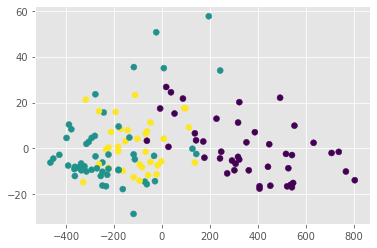

In [10]:
%matplotlib inline
dim_reducer = decomposition.PCA(n_components=2)
plot_data = dim_reducer.fit_transform(X_train)
plt.scatter(*plot_data.T, c=y_train)

In [11]:
lr = linear_model.LogisticRegression(multi_class="multinomial", max_iter=5000, random_state=SEED)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial', random_state=42)

In [12]:
def plot_coefs(class_index):
    c = class_index
    pd.Series(lr.coef_[c], index=features.columns).plot.barh(title=f"Feature sensitivities for class {lr.classes_[c]}")

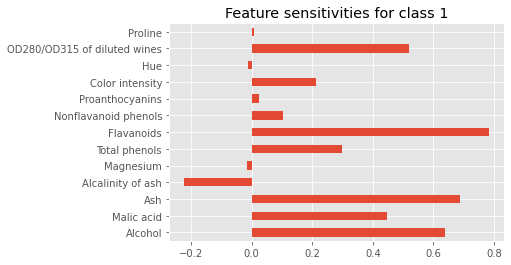

In [13]:
plot_coefs(0)

In [14]:
lr.classes_

array([1, 2, 3])

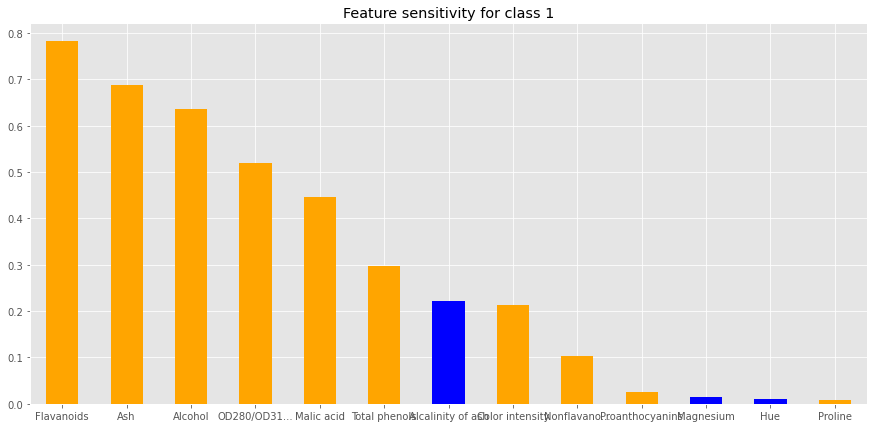

In [15]:
def sort_col_coef(cols, coefs) -> pd.Series:
    """Takes in data attributes with corresponding model coefficients
    And sorts them both according to absolute values of coefficients"""
    cols = np.asarray(cols)
    perm = np.argsort(-np.abs(coefs))
    return cols[perm], coefs[perm]

sort_col_coef(wine_dataset.columns, lr.coef_[0])

def plot_feature_importance(class_index, figsize=(18, 8)):
    cols, coefs = wine_dataset.columns, lr.coef_[class_index]
    cols, coefs = sort_col_coef(cols, coefs)
    colors = ['orange' if i > 0 else 'blue' for i in coefs]
    coefs = np.abs(coefs)
    coef_series = pd.Series(coefs, index=(i[:10]+"..." if len(i) > 18 else i for i in cols))
    coef_series.plot.bar(
        title=f'Feature sensitivity for class {lr.classes_[class_index]}', 
        color=colors, 
        figsize=figsize, 
        rot=0
    )
    
plot_feature_importance(0, figsize=(15, 7))

## How can we verify that the results make sense?  

When talking about the models, the results speak for themselves. However, do these plots acutally say anything about the dataset?  
We can estimate this simply by looking at the performance of the classifier. 

In [16]:
y_pred = lr.predict(X_test)
pd.DataFrame(metrics.classification_report(y_test, y_pred, output_dict=True))

,1,2,3,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0
support,15.0,18.0,12.0,1.0,45.0,45.0


## Wait! There's a library for this  

<!-- 
![image.png](attachment:152011f1-e681-43d9-b6b5-b24dd46db6d9.png) -->
<img src=https://raw.githubusercontent.com/slundberg/shap/master/docs/artwork/shap_header.png width=800/>

In [17]:
import shap
shap.initjs()

In [18]:
explainer = shap.Explainer(lr, X_train, feature_names=features.columns)
explanation = explainer(X_train)

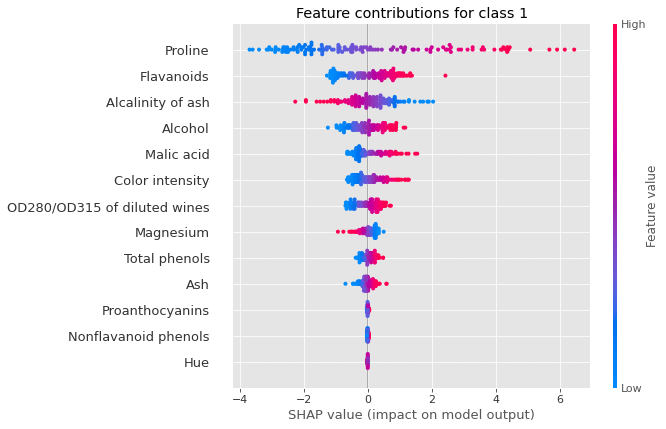

In [19]:
explanation_c1 = explanation[:, :, 0]
explanation_c2 = explanation[:, :, 1]
explanation_c3 = explanation[:, :, 2]
plt.title("Feature contributions for class 1")
shap.summary_plot(explanation_c1)

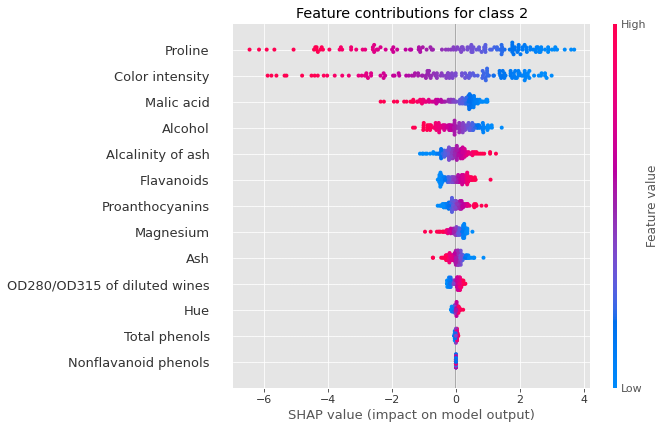

In [20]:
plt.title("Feature contributions for class 2")
shap.summary_plot(explanation_c2)

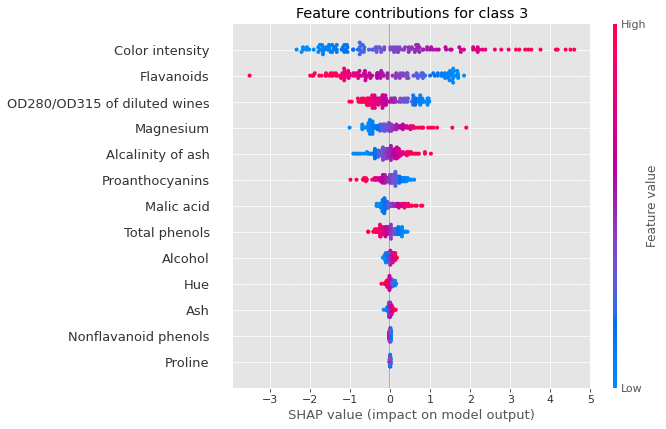

In [21]:
plt.title("Feature contributions for class 3")
shap.summary_plot(explanation_c3)

Let's select a random feature vector and see what the classifier predicts

In [22]:
i = np.random.randint(len(X_test))
x_rand = X_test.iloc[i].to_numpy()
# x_rand = X_test[i]
y_rand = y_test[i]
x_rand

array([1.375e+01, 1.730e+00, 2.410e+00, 1.600e+01, 8.900e+01, 2.600e+00,
       2.760e+00, 2.900e-01, 1.810e+00, 5.600e+00, 1.150e+00, 2.900e+00,
       1.320e+03])

In [23]:
predicted_class, = lr.predict([x_rand])
predicted_class

1

In [24]:
prob, = lr.predict_proba([x_rand])
prob

array([9.99922149e-01, 3.65018611e-06, 7.42008904e-05])

### Why did it predict the class?  

With shap, we can visualize how the model argues for its output. We look at the differnt methods

In [25]:
x_rand_explanation = explainer([x_rand])
class_idx = predicted_class - 1
shap_val, = x_rand_explanation[:, :, class_idx]
shap.plots.force(shap_val)

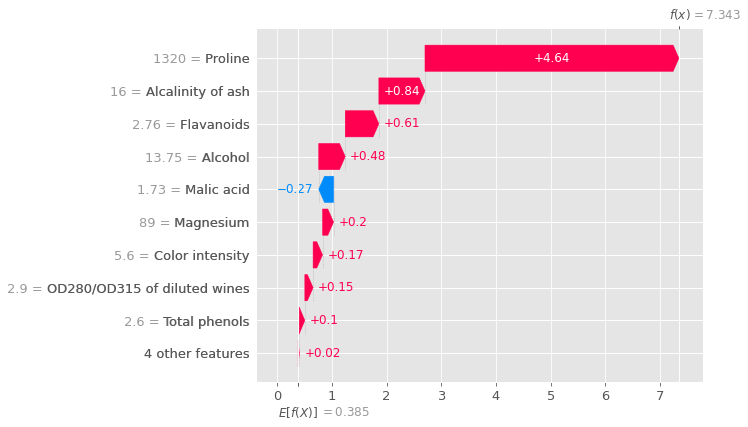

In [26]:
shap.plots.waterfall(shap_val)

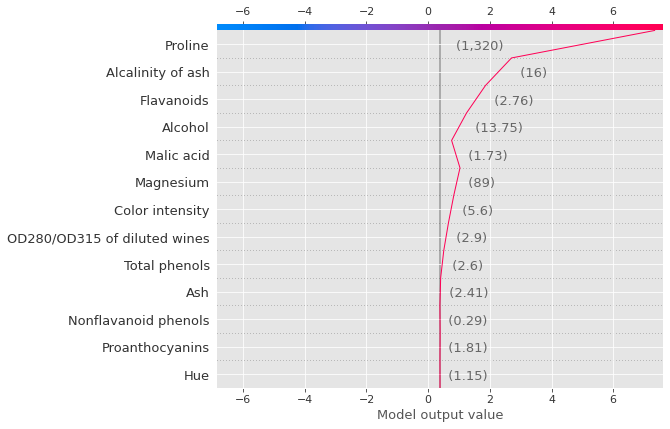

In [27]:
shap.plots.decision(shap_val.base_values, shap_val.values, x_rand, feature_names=list(features.columns))

### Non-linear models  

<img src="https://jtsulliv.github.io/images/perceptron/linsep_new.png?raw=True" />

Logistic regression is explainable by nature, so using using shap's visualizaiton tools for logistic regression is not really what makes this libary useful.  
More complex models are more difficult to explain, and this is where the true benefit of shap values come in to play: When non-linear combinations are required to sufficiently approximate the true decision boundary. In comes the non linear models.  

In this example, we will use a RandomForest classifier: 
RandomForests is known as an "ensemble" machine learning techinque, meaning it constist of multiple classifiers and use their respective predictions to make up a final prediction, or estimate probability. For classification, majority votes is the most typical way of determining the class.  

Of cousre, the dataset we have right now is way too easy, so we'll make it a little harder by removing 5 of the most predictive features:   

In [28]:
features2 = features.drop(["Proline", "Alcohol", "OD280/OD315 of diluted wines", "Flavanoids", "Alcalinity of ash"], axis=1)
features2

,Malic acid,Ash,Magnesium,Total phenols,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue
0,1.71,2.43,127.0,2.80,0.28,2.29,5.64,1.04
1,1.78,2.14,100.0,2.65,0.26,1.28,4.38,1.05
2,2.36,2.67,101.0,2.80,0.30,2.81,5.68,1.03
3,1.95,2.50,113.0,3.85,0.24,2.18,7.80,0.86
4,2.59,2.87,118.0,2.80,0.39,1.82,4.32,1.04
...,...,...,...,...,...,...,...,...
173,5.65,2.45,95.0,1.68,0.52,1.06,7.70,0.64
174,3.91,2.48,102.0,1.80,0.43,1.41,7.30,0.70
175,4.28,2.26,120.0,1.59,0.43,1.35,10.20,0.59
176,2.59,2.37,120.0,1.65,0.53,1.46,9.30,0.60


In [29]:
X2 = features2.to_numpy()
X2.shape

(178, 8)

Let's see how well we can separate the classes with our former model

In [30]:
X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X2, y, random_state=SEED)

def fit_eval(model):
    model.fit(X2_train, y2_train)
    y_pred = model.predict(X2_test)
    return pd.DataFrame(metrics.classification_report(y2_test, y_pred, output_dict=True))

In [31]:
logreg = linear_model.LogisticRegression(multi_class="multinomial", max_iter=5000, random_state=SEED)
logreg_stats = fit_eval(logreg)

logreg_stats

,1,2,3,accuracy,macro avg,weighted avg
precision,0.8,0.833333,1.0,0.866667,0.877778,0.866667
recall,0.8,0.833333,1.0,0.866667,0.877778,0.866667
f1-score,0.8,0.833333,1.0,0.866667,0.877778,0.866667
support,15.0,18.000000,12.0,0.866667,45.000000,45.000000


In [32]:
rf = ensemble.RandomForestClassifier(n_estimators=25, random_state=SEED)
rf_stats = fit_eval(rf)

rf_stats

,1,2,3,accuracy,macro avg,weighted avg
precision,0.937500,1.000000,1.0,0.977778,0.979167,0.979167
recall,1.000000,0.944444,1.0,0.977778,0.981481,0.977778
f1-score,0.967742,0.971429,1.0,0.977778,0.979724,0.977819
support,15.000000,18.000000,12.0,0.977778,45.000000,45.000000


In [33]:
rf = ensemble.RandomForestClassifier(n_estimators=25, random_state=SEED)
rf.fit(features2, y)
rf_explainer = shap.Explainer(rf)
rf_explanation = rf_explainer(features2)

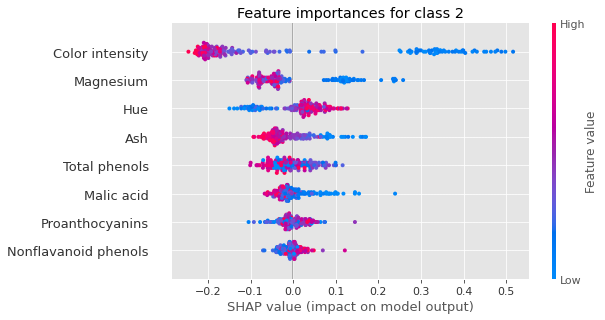

In [34]:
plt.title("Feature importances for class 2")
shap.summary_plot(rf_explanation[:, :, 1])

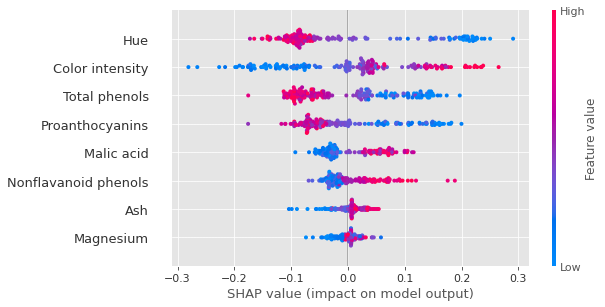

In [35]:
shap.summary_plot(rf_explanation[:, :, 2], title="Feature importances for class 3")

In [36]:
shap.force_plot(rf_explanation[100, :, 0])

In [37]:
explanation_1 = rf_explanation[:, :, 0]

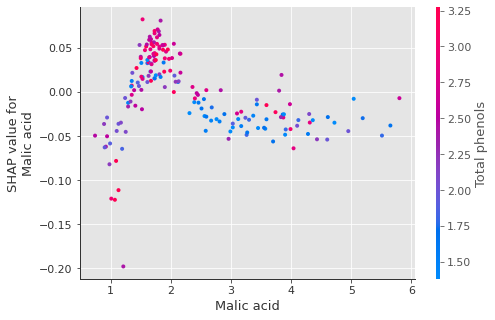

In [38]:
shap.dependence_plot("Malic acid", explanation_1.values, features2, interaction_index="Total phenols")

In contrast, lets see how the dependence plots look with logistic regression

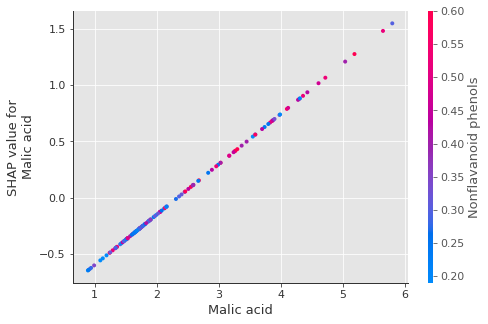

In [39]:
shap.dependence_plot("Malic acid", explanation_c1.values, X_train)